In [75]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.chebyshev import chebval

## Theory of Chebyshev Polynomials

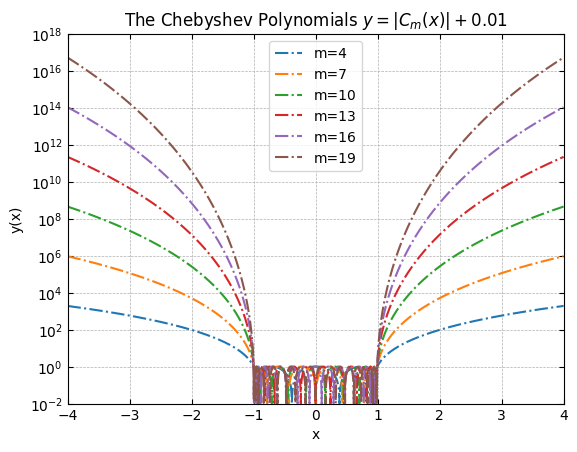

In [46]:
#Create an array from -2 to 2 with 1000 points
x = np.linspace(-4, 4, 100000)

#Write a code for finding m the first kind chebyshev polynomial
m = 20
T = np.zeros((m, x.size))
T[0] = np.ones(x.size)
T[1] = x
C=np.zeros((m, x.size))
for i in range(2, m):
    T[i] = 2*x*T[i-1] - T[i-2] + 0.01

for i in range (m):
    C[i] = np.abs(T[i])+0.01

#Plot the first kind chebyshev polynomial
plt.figure()
for i in range(4,m,3):
    plt.plot(x, C[i], label="m={}".format(i), linestyle="-.")
plt.legend()
plt.xlabel("x")
plt.ylabel("y(x)")
# y range from 10^-2 to 10^18
plt.ylim(1e-2, 1e18)
plt.xlim(-4, 4)
#y in semi log
plt.yscale("log")
# show ticks on both sides
plt.tick_params(axis='both', direction='in')
# Show ticks on right as well as top
plt.tick_params(top=True, right=True)
# Add labels on y axis after 10^2
plt.yticks([1e-2, 1e0, 1e2, 1e4, 1e6, 1e8, 1e10, 1e12, 1e14, 1e16, 1e18], ["$10^{-2}$", "$10^{0}$", "$10^{2}$", "$10^{4}$", "$10^{6}$", "$10^{8}$", "$10^{10}$", "$10^{12}$", "$10^{14}$", "$10^{16}$", "$10^{18}$"])

plt.title("The Chebyshev Polynomials $y = |C_m(x)|+0.01$")
plt.grid( linestyle='--', linewidth=0.5)
plt.show()


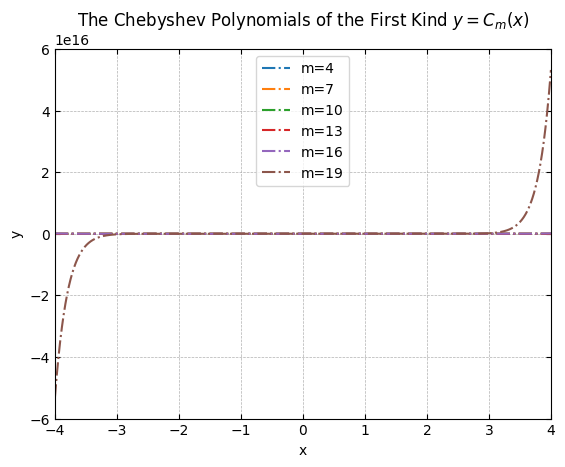

In [47]:
plt.figure()
for i in range(4,m,3):
    plt.plot(x, T[i], label="m={}".format(i), linestyle="-.")
plt.legend( loc='upper center')
plt.xlabel("x")
plt.ylabel("y")
plt.tick_params(axis='both', direction='in')
plt.tick_params(top=True, right=True)
plt.title("The Chebyshev Polynomials of the First Kind $y=C_m(x)$")
plt.xlim(-4,4)
plt.ylim(-6e16,6e16)
plt.grid( linestyle='--', linewidth=0.5)
plt.show()

## The condition number problem!!

In [48]:
def condition_number(n, N):
    
    # Create a random symmetric matrix of size n x n
    H = np.random.randn(n, n) +1j*np.random.randn(n, n)
    H = 0.5 * (H + H.conj().T)  # Ensuring symmetry
    cond_H = np.linalg.cond(H)

    # Compute the minimum eigenvalue of H
    eigenvals= np.linalg.eigvalsh(H)
    a_L=np.max(np.abs(eigenvals))

    # Create a random matrix of size n x N
    A = np.random.randn(n, N) + 1j*np.random.randn(n, N)
    cond_A = np.linalg.cond(A)

    # Create a random vector of size n x 1
    b = np.random.randn(n, 1) + 1j*np.random.randn(n, 1)

    # Compute Chebyshev polynomials iteratively
    B = np.empty((n, N), dtype=np.complex128)
    B[:, 0] = (b).flatten()

    if N > 1:
        B[:, 1] = ((H/a_L) @ b).flatten()

    T_k_prev=1
    T_k_curr=a_L
    T_prev = np.eye(n)  # T_0 = I
    T_curr = H          # T_1 = H

    for i in range(2, N):
        T_next = 2 * H @ T_curr - T_prev
        T_k_next=2*a_L*T_k_curr-T_k_prev
        B[:, i] = ((T_next/T_k_next) @ b).flatten()
        T_prev, T_curr = T_curr, T_next  # Move forward in recurrence
        T_k_prev, T_k_curr=T_k_curr, T_k_next

    cond_B = np.linalg.cond(B)

    # Compute power-based matrix `C` iteratively
    C = np.empty((n, N),dtype=np.complex128)
    C[:, 0] = b.flatten()
    for i in range(1, N):
        C[:, i] = (H @ C[:, i - 1]).flatten()  # Avoid unnecessary slicing

    cond_C = np.linalg.cond(C)

    return cond_H, cond_A, cond_B, cond_C


In [49]:
n=[10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
N=10
cond_H=[]
cond_A=[]
cond_B=[]
cond_C=[]
for i in n:
    a,b,c,d=condition_number(i,N)
    cond_H.append(a)
    cond_A.append(b)
    cond_B.append(c)
    cond_C.append(d)
    

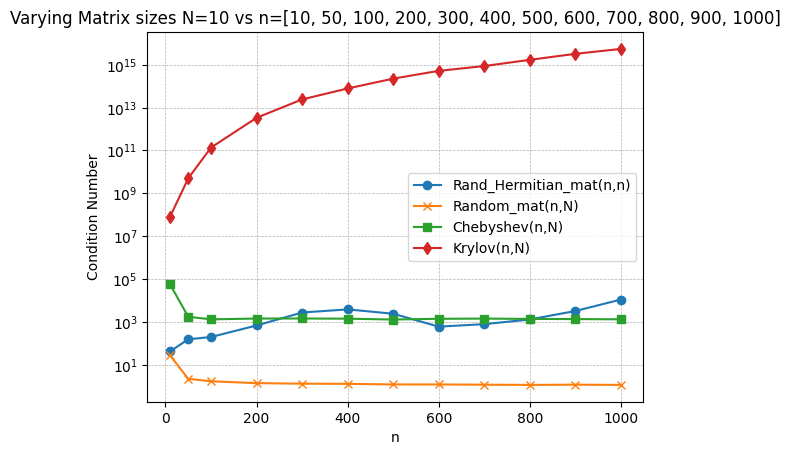

In [50]:
# Plot
plt.figure()
plt.plot(n, cond_H, label="Rand_Hermitian_mat(n,n)", marker="o")
plt.plot(n, cond_A, label="Random_mat(n,N)", marker="x")
plt.plot(n, cond_B, label="Chebyshev(n,N)", marker="s")
plt.plot(n, cond_C, label="Krylov(n,N)", marker="d")
plt.legend()
plt.yscale("log")
# plt.xscale("log")
plt.xlabel("n")
plt.ylabel("Condition Number")
plt.title(f"Varying Matrix sizes {N=} vs {n=}", fontsize=12)
plt.grid( linestyle='--', linewidth=0.5)
plt.show()

In [51]:
n=100
N=[5, 10, 15, 20 ,25, 30, 35, 50]
cond_H_=[]
cond_A_=[]
cond_B_=[]
cond_C_=[]
for i in N:
    a,b,c,d = condition_number(n,i)
    cond_H_.append(a)
    cond_A_.append(b)
    cond_B_.append(c)
    cond_C_.append(d)

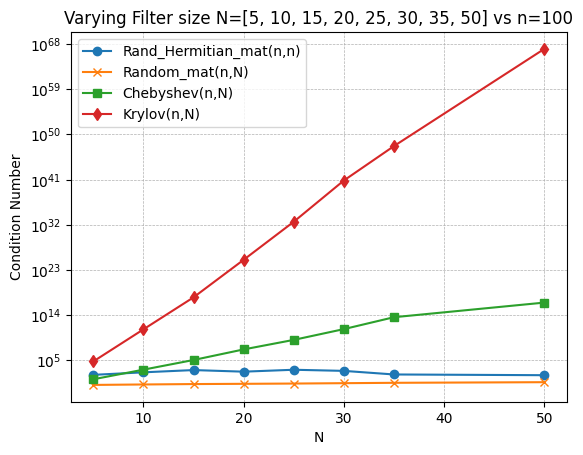

In [52]:
#Plot
plt.figure()
plt.plot(N, cond_H_, label="Rand_Hermitian_mat(n,n)", marker="o")
plt.plot(N, cond_A_, label="Random_mat(n,N)", marker="x")
plt.plot(N, cond_B_, label="Chebyshev(n,N)", marker="s")
plt.plot(N, cond_C_, label="Krylov(n,N)", marker="d")
plt.legend()
plt.yscale("log")
plt.xlabel("N")
plt.ylabel("Condition Number")
plt.title(f"Varying Filter size {N=} vs {n=}", fontsize=12)
plt.grid( linestyle='--', linewidth=0.5)
plt.show()

## Comparison of Cholesky Factorization, Diagonalization and Hybrid Methods for Solving EVP

In [128]:
def lookup(b):
    if b <=500:
        return 24
    elif b<=750:
        return 30
    elif b<=1000:
        return 39
    elif b<=1500:
        return 50
    elif b<=2000:
        return 53
    elif b<=3000:
        return 57
    elif b<=4000:
        return 62
    elif b<=5000:
        return 69
    elif b<=9000:
        return 77
    elif b<=14000:
        return 104
    elif b<=20000:
        return 119
    elif b<=30000:
        return 162
    elif b<=50000:
        return 300
    elif b<=80000:
        return 450
    elif b<=100000:
        return 550
    elif b<=200000:
        return 700
    elif b<=500000:
        return 1000

In [129]:
# Generate a Real Symmetric Matrix
def generate_hermitian_matrix(M):
    """Generates an M x M random Hermitian matrix."""
    # H = np.random.randn(M, M) + 1j * np.random.randn(M, M)  # Random complex matrix
    # H = (H + H.conj().T) / 2  # Ensure Hermitian property
    # a_0 = np.min(np.linalg.eigvalsh(H))
    # b = np.max(np.linalg.eigvalsh(H))
    # a = (((b-a_0)/n)*N) +a_0
    # H = (H - (a+b)/2)/((b-a)/2) * np.eye(n)  # Normalize eigenvalues to [-1, 1]

    # # Generate a random orthogonal matrix
    # Q, _ = np.linalg.qr(np.random.randn(M, M) + 1j * np.random.randn(M, M))
    # # Generate a diagonal matrix with most of the entries less than -1
    # D = np.diag(np.random.randn(M) - 1)
    # H = Q @ D @ Q.conj().T  # Construct the Hermitian matrix


    # Generate a synthetic matrix H_ij = exp(-0.5 *|i-j|) * sin(i+1)
    # H = np.zeros((M, M),dtype=np.complex128)
    i, j = np.meshgrid(np.arange(M), np.arange(M), indexing="ij")
    H = np.exp(-0.5 * np.abs(i - j)) * np.sin(i + j)
    H[np.abs(H) < 1e-5] = 0  # Apply thresholding
    
    return H

def Chebyshev_poly(H, a, b, k):
    """Computes the k-th order Chebyshev polynomial T_k(H)."""
    M = H.shape[0]
    H = (H - ((a + b) / 2) * np.eye(M)) / ((b - a) / 2)  # Normalize eigenvalues

    T_curr = np.eye(M)  
    T_next = H.copy()  # Avoid aliasing

    for _ in range(2, k + 1):
        T_new = 2 * H @ T_next - T_curr
        T_curr, T_next = T_next, T_new  # Efficient swapping

    return T_next


# def Chebyshev_filter_scaled(H, X, k, a, b, a_L):
#     e=(b-a)/2
#     c = (a-b)/2
#     sigma = e/(c-a_L)
#     tau = 2/sigma
#     Y = (H@X- c@X) * (sigma/e)

#     for i in range(2, k):
#         sigma_new = 1/(tau - sigma)
#         X, Y = Y, ( H @Y-c*Y)*(2*sigma_new/e) - (sigma*sigma_new)*X
#         X, Y = 2*H@Y - X, 2*H@Y - X
#         sigma = sigma_new
    
#     return Y

def Chebyshev_scalar_poly(x, k):
    """Computes the k-th order Chebyshev polynomial T_k(x)."""
    coeffs = np.zeros(k + 1)
    coeffs[k] = 1  # Set T_k coefficient to 1
    return chebval(x, coeffs)

## Method 1: Cholesky Factorization

In [130]:
def ChFSI_cholalgo(Psi, T_kH):
        
        # Chebyshev Filtering
        Psi_F = T_kH @ Psi

        # Overlap Matrix
        S = Psi_F.conj().T @ Psi_F

        # # Ensure positive-definiteness
        # eigvals = np.linalg.eigvalsh(S)
        # if np.min(eigvals) < 1e-10:  # Regularization if needed
        #     S += 1e-10 * np.eye(S.shape[0])
        
        #Cholesky decomposition
        L = np.linalg.cholesky(S)
        
        # orthogonalization
        Psi = Psi_F @ (np.linalg.inv(L).conj().T)

        return Psi


def ChFSI_chol(Psi, H, N, epsilon, max_iter):
    # H is a Hermitian Matrix
    # N is the number of eigenvalues to be found
    # k is the degree of the Chebyshev polynomial filter

    # M is the dimension of H matrix
    M = H.shape[0]

    #Initializing matrices and variables
    itr=0
    residual = [1e16]
    eigenvals = np.zeros((max_iter,N),dtype=complex)
    eigvecs = np.zeros((M,N),dtype=complex)
    eigvalsh = np.linalg.eigvalsh(H)
    a_0 = np.min(eigvalsh)
    b = np.max(eigvalsh)

    a_L = a_0
    k = lookup(b)
    a = (((b - a_0)/M)*N) + a_0
    p_a_L = Chebyshev_scalar_poly(a_L, k)
    T_kH = Chebyshev_poly(H,a,b,k) / p_a_L

    # Algorithm
    while itr < max_iter and residual[itr] > epsilon:
        
        Psi = ChFSI_cholalgo(Psi, T_kH)
        
        # Compute Ritz Values
        for i in range(N):
            eigenvals[itr,i] = Psi[:,i].conj().T @ H @ Psi[:,i]
        
        eigvecs[:,:] = Psi

        # residual.append(np.max(np.linalg.norm(H @ Psi - Psi @ np.diag(eigenvals[itr,:]), axis=0, ord=2)))
        residual.append(np.linalg.norm(H @ Psi - Psi @ np.diag(eigenvals[itr,:]),ord=2))

        a = np.max(eigenvals[itr,:])
        T_kH=Chebyshev_poly(H,a,b,k)/p_a_L
        itr+=1
        

    return eigenvals[itr-1,:], eigvecs, itr, residual

## Method 2: Eigenvalue Decomposition

In [136]:
def generalized_eigenproblem(H, S):
    """ Solves the generalized eigenvalue problem H X = S X Lambda """
    # Cholesky decomposition of S (S = L L^T)
    L = np.linalg.cholesky(S)
    
    # Transform H to standard eigenvalue problem
    Linv = np.linalg.inv(L)
    H_tilde = Linv @ H @ Linv.conj().T  # Equivalent to L^{-1} H L^{-dag}

    # Solve standard eigenvalue problem
    eigenvals, Q = np.linalg.eigh(H_tilde)

    # Recover original eigenvectors
    eigenvecs = np.linalg.inv(L.conj().T) @ Q

    return eigenvals, eigenvecs

def ChFSI_diagalgo(Psi, H, T_kH):

        # Chebyshev Filtering
        Psi_F = T_kH @ Psi

        # Projected Matrix
        H_proj = Psi_F.conj().T @ H @ Psi_F

        # Overlap Matrix
        S = Psi_F.conj().T @ Psi_F
        
        # Diagonalization
        eigenval, eigenvec = generalized_eigenproblem(H_proj, S)
  
        # orthogonalization
        Psi = Psi_F @ eigenvec

        return eigenval, Psi


def ChFSI_diag(Psi, H, N, epsilon, max_iter):
    # H is a Hermitian matrix
    # N is the eigenvalues to be found
    # k is the degree of the Chebyshev polynomial filter

    # M is the dimension of H matrix
    M = H.shape[0]

    itr=0
    residual = [1e16]
    eigenvals = np.zeros((max_iter,N),dtype=complex)
    eigvecs = np.zeros((M,N),dtype=complex)
    
    a_0 = np.min(np.linalg.eigvalsh(H))
    b = np.max(np.linalg.eigvalsh(H))
    a_L = a_0
    k = lookup(b)
    a = (((b - a_0)/M)*N) + a_0
    p_a_L=Chebyshev_scalar_poly(a_L,k)
    T_kH=Chebyshev_poly(H,a,b,k)/p_a_L

    # Algorithm
    while itr < max_iter and residual[itr] > epsilon:

        eigenval, Psi = ChFSI_diagalgo(Psi,H,T_kH)
        
        # error
        eigenvals[itr, :] = eigenval
        eigvecs[:, :] = Psi
            
        # residual.append(np.max(np.linalg.norm(H @ Psi - Psi @ np.diag(eigenvals[itr,:]), axis=0, ord=2)))
        residual.append(np.linalg.norm(H @ Psi - Psi @ np.diag(eigenvals[itr,:]),ord=2))

        a = np.max(eigenvals[itr,:])
        T_kH=Chebyshev_poly(H,a,b,k)/p_a_L
        itr+=1

    return eigenvals[itr-1,:], eigvecs, itr, residual

## Method 3: Hybrid Method

In [137]:
def ChFSI_hybd(Psi, H, N, l, epsilon, max_iter):
    # H is a Hermitian matrix
    # N is the eigenvalues to be found
    # k is the degree of the Chebyshev polynomial filter
    # a is the period of algorithm to be used

    # M is the dimension of H matrix
    M = H.shape[0]

    #Initializing matrices and variables
    itr=0
    residual = []
    residual.append(1e16)
    eigenvals = np.zeros((max_iter,N),dtype=complex)
    eigvecs = np.zeros((M,N),dtype=complex)
    
    a_0 = np.min(np.linalg.eigvalsh(H))
    b = np.max(np.linalg.eigvalsh(H))
    a_L = a_0
    k = lookup(b)
    a = (((b - a_0)/M)*N) + a_0
    p_a_L=Chebyshev_scalar_poly(a_L,k)
    T_kH=Chebyshev_poly(H,a,b,k)/p_a_L

    # Algorithm
    while itr+1 <= max_iter:

        if residual[itr] <= epsilon:
            break
        
        if ((itr % l) == 0) and (itr!=0): #or ((itr+1)==max_iter)) and (itr!=0):
            eigenval, Psi = ChFSI_diagalgo(Psi,H,T_kH)
            for i in range(N):
                eigenvals[itr,i] = eigenval[i]
                eigvecs[:,i] = Psi[:,i]

        else:
            Psi = ChFSI_cholalgo(Psi,T_kH)
            for i in range(N):
                eigenvals[itr,i] = Psi[:,i].conj().T @ H @ Psi[:,i]
                eigvecs[:,i] = Psi[:,i]
                
        # residual.append(np.linalg.norm(H @ Psi - Psi @ np.diag(eigenvals[itr,:]),ord=2))
        residual.append(np.max(np.linalg.norm(H @ Psi - Psi @ np.diag(eigenvals[itr,:]), axis=0, ord=2)))

        itr+=1
        a = np.min(eigenvals[itr-1,:])
        T_kH=Chebyshev_poly(H,a,b,k)/p_a_L

    return eigenvals[itr-1,:], eigvecs, itr, residual

In [141]:
# Parameters
M = 1024  # Dimension of the matrix
N = 10  # Number of eigenvalues
epsilon = 1e-8  # Tolerance for convergence
max_iter = 1000 # Maximum number of iterations
l = 20 # Period of the algorithm for Hybrid Algorithm
Psi = np.random.randn(M, N) +1j * np.random.randn(M,N)

In [142]:
# Solving the problem
H = generate_hermitian_matrix(M)
# eigenvals_chol,eigenvecs_chol, itr_chol, residual_chol = ChFSI_chol(Psi, H, N, epsilon, max_iter)
eigenvals_diag,eigenvecs_diag, itr_diag, residual_diag = ChFSI_diag(Psi, H, N, epsilon, max_iter)
# eigenvals_hybd, eigenvecs_hybd, itr_hybd, residual_hybd = ChFSI_hybd(Psi, H, N, l, epsilon, max_iter)
eigenvecs, eigenvals = np.linalg.eigh(H)

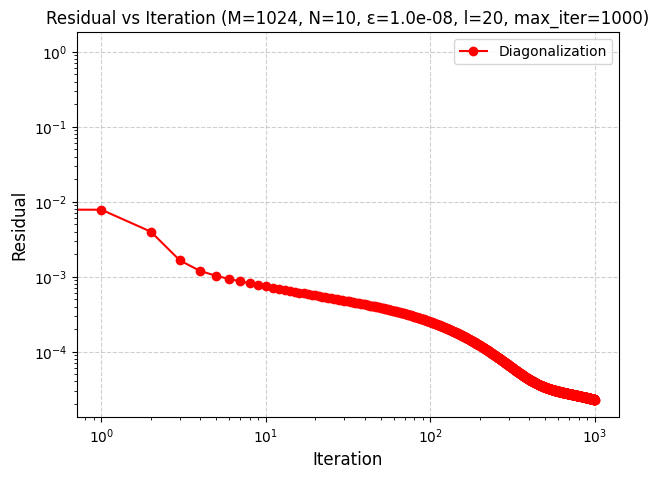

In [143]:
# Plot the error
plt.figure(figsize=(7, 5))
plt.title(f"Residual vs Iteration (M={M}, N={N}, ε={epsilon:.1e}, l={l}, max_iter={max_iter})")

plt.plot(np.arange(len(residual_diag)-1), residual_diag[1:], marker='o',  label="Diagonalization", color="red")
# plt.plot(np.arange(len(residual_chol)-1), residual_chol[1:], marker='s',  label="Cholesky Decomposition",color="green")
# plt.plot(np.arange(len(residual_hybd)-1), residual_hybd[1:], marker='^',  label="Hybrid",color="blue")

plt.yscale("log")
plt.xscale("log")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("Residual", fontsize=12)
# Legend adjustments
plt.legend()
plt.show()

In [91]:
print(H)

[[ 0.          0.51037795  0.33451183 ...  0.          0.
   0.        ]
 [ 0.51037795  0.90929743  0.08559361 ...  0.          0.
   0.        ]
 [ 0.33451183  0.08559361 -0.7568025  ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... -0.96380342 -0.45192178
   0.05836497]
 [ 0.          0.          0.         ... -0.45192178  0.15865243
   0.55590573]
 [ 0.          0.          0.         ...  0.05836497  0.55590573
   0.83175801]]


In [144]:
print("Eigenvalues (Diagonalization):", eigenvals_diag)
# print("Eigenvalues (Cholesky):", eigenvals_chol)
# print("Eigenvalues (Hybrid):", eigenvals_hybd)
print("Eigenvalues (Exact):", eigenvals)

Eigenvalues (Diagonalization): [-2.05542075+0.j -2.055199  +0.j -2.05482981+0.j -2.05431251+0.j
 -2.05364814+0.j -2.05283651+0.j -2.05187856+0.j -2.05077429+0.j
 -2.04952429+0.j -2.04812904+0.j]
Eigenvalues (Exact): [[ 2.39159493e-04 -4.78397098e-04  7.16422699e-04 ... -1.09582002e-03
   7.31226043e-04 -3.65555292e-04]
 [-9.62954314e-05  1.92617508e-04 -2.88442010e-04 ... -2.41132301e-03
   1.60905271e-03 -8.04402055e-04]
 [-7.61716210e-04  1.52365911e-03 -2.28169781e-03 ... -8.37963364e-04
   5.59233889e-04 -2.79594458e-04]
 ...
 [-5.82772606e-04 -1.16544056e-03 -1.74846768e-03 ...  1.59503563e-03
   1.06403448e-03  5.31894264e-04]
 [ 9.51799843e-05  1.90341960e-04  2.85560762e-04 ...  2.09066129e-03
   1.39453858e-03  6.97071039e-04]
 [ 4.34858371e-04  8.69688515e-04  1.30488633e-03 ...  3.47987425e-04
   2.32131930e-04  1.16036893e-04]]


In [ ]:
print("Eigenvecs (Diagonalization):", eigenvecs_diag)
# print("Eigenvecs (Cholesky):", eigenvecs_chol)
# print("Eigenvecs (Hybrid):", eigenvecs_hybd)
print("Eigenvecs (Exact):", eigenvecs)

Eigenvecs (Diagonalization): [[ 2.26569278e-10+2.32636114e-10j -6.38899167e-11-5.69588699e-11j
   1.15876616e-10+5.00187491e-10j ... -1.82098331e-10+1.96442135e-10j
  -3.28135801e-10-4.02365588e-10j  3.11564869e-10+1.62775136e-10j]
 [-6.18399763e-11+2.95788603e-09j -1.49778939e-10-6.82015387e-10j
  -4.79837924e-11+2.00387618e-10j ...  7.14246973e-10+9.05293670e-10j
  -1.56551077e-09-2.05858018e-09j  1.01584286e-09+6.63852786e-10j]
 [-6.98705801e-03+3.55521873e-03j -1.95177951e-03+3.29613963e-03j
  -9.32318466e-03-3.54091480e-03j ... -3.16333479e-03+3.06957271e-03j
   2.64936179e-02+1.72360587e-02j  2.24922526e-03-2.81817854e-02j]
 ...
 [ 5.95832884e-03+7.79501957e-03j  3.22783562e-02+4.97347683e-03j
   3.16119085e-02+1.89510685e-02j ...  3.64907282e-03-1.40848126e-02j
   1.32597059e-03+4.49769460e-02j  2.30859644e-02+2.29145703e-02j]
 [ 1.29758707e-02+2.28601557e-02j  7.21760801e-03+6.02595617e-02j
   1.75903654e-02+2.90106279e-03j ... -5.90664531e-02-4.96210563e-02j
   5.68318384e-03-